# **Creating a neural network from scratch using numpy to classify 2x2 matrices**

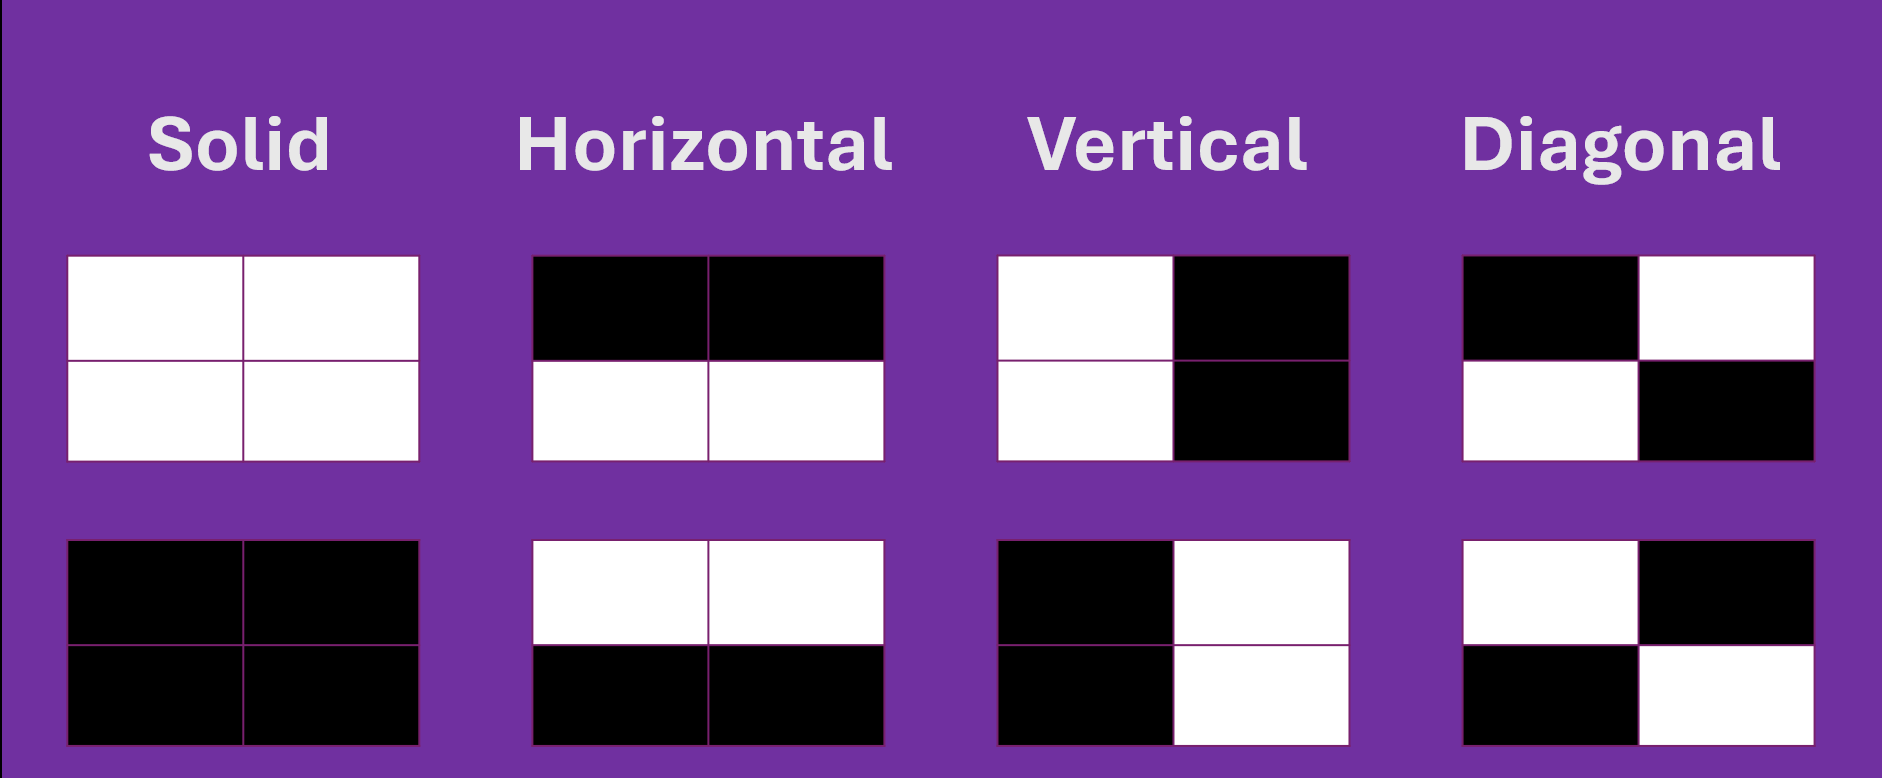

# Problem Understanding
We have 2x2 matrices where each cell is black (1) or white (0). The possible classifications are:

Solid: All black or all white.

Vertical: Two columns are consistent (e.g., [[1, 0], [1, 0]]).

Horizontal: Two rows are consistent (e.g., [[1, 1], [0, 0]]).

Diagonal: Diagonal patterns (e.g., [[1, 0], [0, 1]]).

The input size is 4 (flattened 2x2 matrix), and the output size is 4 (one-hot encoded classification).

# Step-by-Step Plan
**Step 2.1: Data Representation**<br/>
Flatten the 2x2 matrix into a 1D array for simplicity. Each matrix will be represented as [x1, x2, x3, x4].<br/>

**Step 2.2: Initialize Parameters**<br/>
We'll use a single hidden layer neural network:<br/>
* Input layer: 4 neurons (for the flattened matrix).<br/>
* Hidden layer: Choose, say, 8 neurons with ReLU activation.<br/>
* Output layer: 4 neurons (Softmax for classification).<br/>

Weights and biases are randomly initialized.<br/>

**Step 2.3: Forward Propagation**<br/>
* Compute the activation of the hidden layer using ```Z1 = W1.X + b1``` and ```A1 = ReLU(Z1)```.<br/>
* Compute the output layer using ```Z2 = W2.A1 + b2``` and ```A2 = Softmax(Z2)```.<br/>

**Step 2.4: Loss Function**<br/>
Use cross-entropy loss: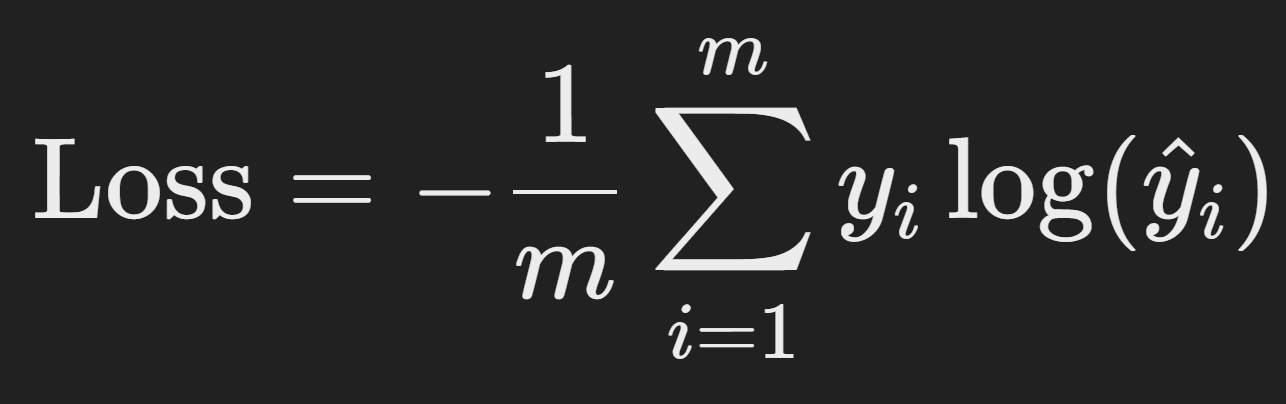<br/>

**Step 2.5: Backward Propagation**<br/>
* Compute gradients for output and hidden layers.<br/>
* Update weights and biases using gradient descent.<br/>

**Step 2.6: Train the Model**<br/>
* Train the network on a set of examples.<br/>
* Monitor loss and accuracy during training.<br/>

### ***First we will import numpy to work with arrays in python***

In [ ]:
import numpy as np

### ***Creating an Activation Function***
This is a ReLU (Rectified Linear Unit) function. It takes a number and:
* If the number is negative, it makes it 0.
* If it’s positive, it keeps it as is.

In [ ]:
def relu(x):
  return np.maximum(0,x)

## **The function relu_derivative(x) computes the derivative of the ReLU (Rectified Linear Unit) activation function.**

Explanation:<br/>
**1. ReLU Activation Function:**<br/>
   The ReLU function is defined as:<br/>
   `f(x)= x ​ if x>0  ​`<br/>
   `f(x)= 0 ​ if x≤0  ​`<br/>
 Its derivative is:<br/>
   `f'(x)= 1 ​ if x>0  ​`<br/>
   `f'(x)= 0 ​ if x≤0  ​`<br/>
What the function does:<br/>

* The expression (x > 0) creates a boolean array where each element is True if the corresponding element of x is greater than 0 and False otherwise.
* .astype(float) converts this boolean array to a float array, where True becomes 1.0 and False becomes 0.0.
* Thus, the function returns 1.0 for elements of x that are greater than 0 and 0.0 for elements less than or equal to 0, which corresponds to the derivative of the ReLU function.

In [ ]:
def relu_derivative(x):
    return (x > 0).astype(float)

## ***Softmax Activation Function***

### ***Make the numbers stable***
1. `np.max(x, axis=0, keepdims=True)`<br/>
* We find the biggest number in the list `x`.
* This helps to keep the math safe and avoid super big numbers (it’s called a "stability fix").
* Example: If `x = [2, 3, 5]`, the biggest number is `5`.

2. `x - np.max(x, axis=0, keepdims=True)`<br/>
* Subtract the biggest number from every number in `x`.
* Example: `[2, 3, 5] - 5` becomes `[-3, -2, 0]`.

3. `np.exp(...)`
* Now we take the exponential (a fancy math operation) of the adjusted numbers.
* Example: `np.exp([-3, -2, 0])` becomes `[0.05, 0.14, 1]`.

### ***Turn the numbers into probabilities***
1. `np.sum(exp_x, axis=0, keepdims=True)`
* Add up all the new numbers.
* Example: `[0.05, 0.14, 1]` adds up to `1.19`.

2. `exp_x / np.sum(...)`
* Divide each number by the total to make them into probabilities.
* Example:
   * 0.05 / 1.19 ≈ 0.04
   * 0.14 / 1.19 ≈ 0.12
   * 1 / 1.19 ≈ 0.84.

* Now you have probabilities: `[0.04, 0.12, 0.84]`.

In [ ]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))  # Stability fix
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

## ***LOSS FUNCTION***
### ***1.Get the number of samples***<br/>

* We’re counting how many examples (or data points) we’re working with.
* `y_true.shape[1]`: The shape gives the dimensions of y_true.<br/>
 * If y_true is a matrix, the second number `(1)` tells us how many samples we have.
* Example: If y_true is a matrix with shape `(3, 5)`, it means there are `5` samples.
### ***2.Calculate the loss***<br/>
1. `np.log(y_pred)`
* Take the natural logarithm of each predicted probability in y_pred.
* This step is important for how cross-entropy works mathematically.
2. `y_true * np.log(y_pred)`
* Multiply the true labels `(y_true)` with the logarithm of the predicted probabilities `(np.log(y_pred))`.
* This ensures we only consider the predictions for the correct labels.
* Example: If `y_true = [1, 0, 0]` and `y_pred = [0.7, 0.2, 0.1]`, only 0.7 (the probability of the correct label) is used.
3. `np.sum(...)`
* Add up all the values from the previous step for all samples.
* Example: If you have predictions for 3 samples, you’ll sum the contributions from all 3.
4. `- (negative sign)`
* Cross-entropy involves taking the negative of the sum. This makes the loss a positive value.
5. `/ m`
* Divide by the number of samples `(m)` to get the average loss per sample.



In [ ]:
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[1]
    return -np.sum(y_true * np.log(y_pred)) / m

# ***Initialization***
### 1. **Define the function**<br/>
* We’re defining a function called `initialize_parameters`.
It takes three inputs:
  * `input_size`: How many features go into the network (number of input neurons).
  * `hidden_size`: How many neurons are in the hidden layer.
  * `output_size`: How many outputs the network produces (number of output neurons).<br/>

### 2. **Set a random seed**<br/>
* `np.random.seed(42)`
* Setting a random seed ensures that the random numbers generated are always the same every time you run the code. This helps with reproducibility, so results don’t vary randomly.

### 3. **Initialize weights and biases**<br/>
## Weights for Layer 1 (𝑊1)
## `W1 = np.random.randn(hidden_size, input_size) * 0.01`
* np.random.randn(hidden_size, input_size) generates a random matrix of size `hidden_size x input_size` with values from a standard normal distribution (mean = 0, standard deviation = 1).
* Multiplying by 0.01 scales these values down to make them small. This helps the network start learning without large gradients that might destabilize training.
* Example: If hidden_size = 3 and input_size = 2, then
W1 will be a 3×2 matrix.


## Biases for Layer 1 (b1)
## `b1 = np.zeros((hidden_size, 1))`
* `np.zeros((hidden_size, 1))` creates a matrix of zeros with `hidden_size x 1` dimensions.
* Biases are initialized to zero because they don’t need random starting values.

## **Similarly we do it for layer 2 (weight and biase)**
## `W2 = np.random.randn(output_size, hidden_size) * 0.01`
## `b2 = np.zeros((output_size, 1))`



In [ ]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

# ***Forward Propagation***
* `Z1 = np.dot(W1, X) + b1`: Multiply inputs (X) by weights (W1) and add biases (b1). This gives the first hidden layer's signals.
* `A1 = relu(Z1)`: Apply ReLU to make these signals cleaner.
* `Z2 = np.dot(W2, A1) + b2`: Multiply hidden layer signals (A1) by weights (W2) and add biases (b2). This gives the final layer's signals.
* `A2 = softmax(Z2)`: Apply Softmax to turn final signals into probabilities for classification.

In [ ]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# ***Backward Propagation***
* dZ2: Difference between the robot’s guess and the true answer.
* dW2: Adjustments for the final layer weights.
* db2: Adjustments for the final layer biases.
* dA1: Feedback to the first layer.
* dZ1: Adjustments for the first layer.
* dW1, db1: Adjustments for the first layer weights and biases.

In [ ]:
def backward_propagation(X, Y, Z1, A1, A2, W2):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2

# ***Parameter updates***


In [ ]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# ***Training the Model***

* initialize_parameters: Give the neurons their starting rules.
* forward_propagation: Make guesses.
* cross_entropy_loss: Measure how wrong the guesses are.
* backward_propagation: Calculate how to improve.
* update_parameters: Teach the neurons better rules.
* Repeat for a set number of iterations.

In [ ]:
def train(X, Y, input_size, hidden_size, output_size, learning_rate, iterations):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        loss = cross_entropy_loss(Y, A2)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, A2, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss}")
    return W1, b1, W2, b2

In [ ]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = np.argmax(A2, axis=0)
    return predictions

In [ ]:
# Example data (flattened 2x2 matrices and labels)
X_train = np.array([[1, 1, 0, 0], [0, 0, 1, 1], [1, 0, 1, 0], [0, 1, 0, 1]]).T
Y_train = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]).T

# Hyperparameters
input_size = 4
hidden_size = 8
output_size = 4
learning_rate = 0.1
iterations = 1000

# Train the model
W1, b1, W2, b2 = train(X_train, Y_train, input_size, hidden_size, output_size, learning_rate, iterations)


In [ ]:
# User input for prediction
while True:
    print("\nEnter a 2x2 binary matrix (row by row):")
    try:
        user_matrix = []
        for i in range(2):
            row = list(map(int, input(f"Row {i + 1}: ").split()))
            if len(row) != 2 or any(cell not in (0, 1) for cell in row):
                raise ValueError("Each row must contain exactly 2 binary values (0 or 1).")
            user_matrix.extend(row)
        user_matrix = np.array(user_matrix).reshape(-1, 1)
        prediction = predict(user_matrix, W1, b1, W2, b2)
        classes = ["Solid", "Horizontal", "Vertical", "Diagonal"]
        print(f"Prediction: {classes[prediction[0]]}")
    except Exception as e:
        print(f"Error: {e}")
    cont = input("Do you want to try another matrix? (yes/no): ").strip().lower()
    if cont != 'yes':
        break


Enter a 2x2 binary matrix (row by row):
Row 1: 0 0
Row 2: 0 0
Prediction: Solid
